In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score

from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
netflix=pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_3\Project_week_7\imdb_processed.csv')
netflix.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [3]:
netflix.dtypes

Unnamed: 0      int64
title          object
year          float64
kind           object
genre          object
rating        float64
vote          float64
country        object
language       object
cast           object
director       object
composer       object
writer         object
runtime       float64
dtype: object

In [4]:
netflix.year=netflix.year.astype(int)

In [5]:
netflix['year'].dtypes

dtype('int32')

In [6]:
netflix.kind.value_counts()

movie             4995
video movie       1295
tv movie           758
tv series          611
episode            520
tv mini series     239
video game          20
tv short            13
Name: kind, dtype: int64

In [7]:
netflix['kind'] = netflix['kind'].replace(['video movie', 'tv movie', 'tv series', 'episode', 'tv mini series' ],['movie', 'movie', 'series', 'series', 'series'])
netflix['kind'].value_counts()

movie         7048
series        1370
video game      20
tv short        13
Name: kind, dtype: int64

In [8]:
netflix.genre.value_counts()

['Documentary']                                             452
['Drama']                                                   451
['Documentary', 'Music']                                    326
['Comedy']                                                  311
['Drama', 'Romance']                                        283
                                                           ... 
['Short', 'Fantasy']                                          1
['Thriller', 'Action', 'Fantasy', 'Horror']                   1
['Animation', 'Adventure', 'Comedy', 'Horror', 'Sci-Fi']      1
['Animation', 'Drama', 'Family']                              1
['Animation', 'Action', 'Adventure', 'Crime', 'Mystery']      1
Name: genre, Length: 1436, dtype: int64

In [9]:
netflix['genre']=netflix['genre'].str.replace("[", "").str.replace("]", "")
netflix['genre']

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_19528/2158865298.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix['genre']=netflix['genre'].str.replace("[", "").str.replace("]", "")


0                    'Documentary', 'Animation', 'Family'
1                                                'Family'
2                                      'Action', 'Sci-Fi'
3       'Documentary', 'Comedy', 'Drama', 'Fantasy', '...
4                            'Comedy', 'Horror', 'Sci-Fi'
                              ...                        
8446                     'Adventure', 'Family', 'Fantasy'
8447                'Documentary', 'Biography', 'History'
8448                                 'Sci-Fi', 'Thriller'
8449                          'Drama', 'Music', 'Romance'
8450          'Action', 'Adventure', 'Sci-Fi', 'Thriller'
Name: genre, Length: 8451, dtype: object

In [10]:
netflix_genre= netflix.genre.str.split(',').apply(pd.Series)
netflix['genre']=netflix_genre[0]

In [11]:
netflix['genre']

0       'Documentary'
1            'Family'
2            'Action'
3       'Documentary'
4            'Comedy'
            ...      
8446      'Adventure'
8447    'Documentary'
8448         'Sci-Fi'
8449          'Drama'
8450         'Action'
Name: genre, Length: 8451, dtype: object

In [12]:
netflix.country.value_counts()

['United States']                               3813
['United Kingdom']                               742
['Japan']                                        573
['India']                                        247
['Hong Kong']                                    216
                                                ... 
['Sweden', 'Norway']                               1
['France', 'Martinique']                           1
['Netherlands', 'Luxembourg']                      1
['India', 'United States', 'United Kingdom']       1
['Israel', 'France', 'United States']              1
Name: country, Length: 650, dtype: int64

In [13]:
netflix['country']=netflix['country'].str.replace("[", "").str.replace("]", "")
netflix['country']

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_19528/3256566476.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix['country']=netflix['country'].str.replace("[", "").str.replace("]", "")


0                                    'United States'
1                                    'United States'
2                                            'Japan'
3                                    'United States'
4                                    'United States'
                            ...                     
8446                                         'Japan'
8447                                             NaN
8448                                 'United States'
8449    'United States', 'Germany', 'United Kingdom'
8450                       'United States', 'Mexico'
Name: country, Length: 8451, dtype: object

In [14]:
netflix_country= netflix.country.str.split(',').apply(pd.Series)
netflix['country']=netflix_country[0]

In [15]:
netflix['country'].value_counts().head(15)

'United States'     4203
'United Kingdom'    1061
'Japan'              608
'Canada'             373
'France'             349
'Hong Kong'          265
'India'              254
'Italy'              152
'Germany'            111
'Australia'          106
'Spain'               73
'West Germany'        50
'Sweden'              38
'South Korea'         38
'Soviet Union'        31
Name: country, dtype: int64

In [16]:
netflix.country.unique()

array(["'United States'", "'Japan'", nan, "'United Kingdom'", "'India'",
       "'France'", "'Canada'", "'Brazil'", "'Hong Kong'", "'Romania'",
       "'Soviet Union'", "'Thailand'", "'Mexico'", "'Spain'", "'Germany'",
       "'Switzerland'", "'West Germany'", "'Iran'", "'Russia'",
       "'Czechia'", "'Italy'", "'Taiwan'", "'Israel'", "'Norway'",
       "'Jamaica'", "'Poland'", "'Australia'", "'Sweden'", "'Bulgaria'",
       "'Czechoslovakia'", "'Netherlands'", "'Argentina'",
       "'South Africa'", "'New Zealand'", "'China'", "'Ireland'",
       "'Austria'", "'Vietnam'", "'South Korea'", "'Iceland'",
       "'Federal Republic of Yugoslavia'", "'East Germany'", "'Hungary'",
       "'Belgium'", "'Philippines'", "'Denmark'", "'Peru'", "'Greece'",
       "'Cuba'", "'Portugal'", "'Cambodia'", "'Finland'", "'Aruba'",
       "'Tunisia'", "'Yugoslavia'", "'Chile'",
       "'Palestinian Territories'", "'Armenia'", "'Indonesia'",
       "'Ecuador'", "'Côte d’Ivoire'", "'Morocco'", "'Afghanist

In [17]:
netflix.dtypes

Unnamed: 0      int64
title          object
year            int32
kind           object
genre          object
rating        float64
vote          float64
country        object
language       object
cast           object
director       object
composer       object
writer         object
runtime       float64
dtype: object

In [18]:
netflix.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States',['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States',['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992,movie,'Action',5.5,93.0,'Japan',['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States',"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States',['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [19]:
netflix['language']=netflix['language'].str.replace("[", "").str.replace("]", "")
netflix['language']

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_19528/1140624630.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix['language']=netflix['language'].str.replace("[", "").str.replace("]", "")


0                             'English'
1                             'English'
2                            'Japanese'
3        'English', 'German', 'Spanish'
4                             'English'
                     ...               
8446                         'Japanese'
8447               'English', 'Spanish'
8448                          'English'
8449                          'English'
8450    'English', 'Spanish', 'Russian'
Name: language, Length: 8451, dtype: object

In [20]:
netflix_language= netflix.language.str.split(',').apply(pd.Series)
netflix['language']=netflix_language[0]

In [21]:
netflix.language.value_counts()

'English'                   5998
'Japanese'                   510
'French'                     305
'Hindi'                      233
'Cantonese'                  217
                            ... 
'Sicilian'                     1
'Dyula'                        1
'American Sign Language'       1
'Dzongkha'                     1
'Malayalam'                    1
Name: language, Length: 65, dtype: int64

In [22]:
netflix.isna().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

# Number of movies per year

In [23]:
plot1=pd.DataFrame(netflix.groupby('year')['title'].count())
plot1

,title
year,
1905,5
1910,1
1913,1
1914,1
1916,1
...,...
2001,623
2002,643
2003,683


C:\Users\Administrateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='title'>

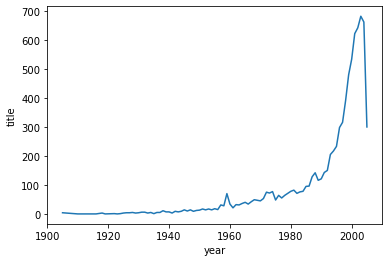

In [24]:
sns.lineplot(plot1.index, plot1['title'])

# Movies per country

In [25]:
plot2=pd.DataFrame(netflix.groupby('country')['title'].count().sort_values(ascending = False))
plot2

,title
country,
'United States',4203
'United Kingdom',1061
'Japan',608
'Canada',373
'France',349
...,...
'Ecuador',1
'Greenland',1
'Palestinian Territories',1


<AxesSubplot:xlabel='country'>

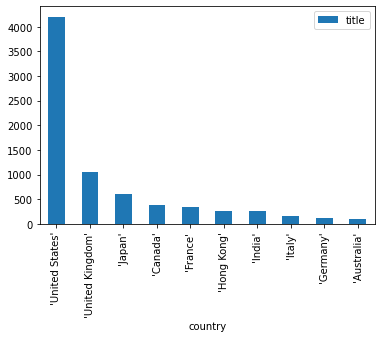

In [26]:
plot2.head(10).plot(kind='bar')

# The most popular genre per year

In [27]:
netflix.groupby(['year','genre'])['genre'].count().sort_values().groupby(level=0).tail(1).sort_values(ascending = False)

year  genre        
2004  'Documentary'    190
2003  'Documentary'    155
2002  'Documentary'    144
2001  'Documentary'    120
2000  'Drama'          109
                      ... 
1919  'Drama'            1
1913  'Short'            1
1910  'Documentary'      1
1924  'Adventure'        1
1925  'Drama'            1
Name: genre, Length: 91, dtype: int64

# The most popular genre per country

In [28]:
netflix.groupby(['country','genre'])['genre'].count().sort_values().groupby(level=0).tail(1).sort_values(ascending = False)

country           genre        
'United States'   'Documentary'    960
'Japan'           'Animation'      385
'United Kingdom'  'Drama'          210
'Hong Kong'       'Action'         186
'France'          'Drama'          126
                                  ... 
'Venezuela'       'Comedy'           1
'Chile'           'Action'           1
'Colombia'        'Crime'            1
'Singapore'       'Comedy'           1
'Peru'            'Action'           1
Name: genre, Length: 67, dtype: int64

In [29]:
netflix.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States','English',"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States','English',"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992,movie,'Action',5.5,93.0,'Japan','Japanese',"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States','English',"['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States','English',"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [30]:
netflix.drop(['composer', 'writer', 'runtime', 'director'], axis=1, inplace=True)

In [31]:
netflix

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast
0,0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States','English',"['Christian Slater', 'Scott Sampson']"
1,1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States','English',"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',..."
2,2,8 Man,1992,movie,'Action',5.5,93.0,'Japan','Japanese',"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko..."
3,3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States','English',"['Marlee Matlin', 'Elaine Hendrix', 'John Ross..."
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States','English',"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'..."
...,...,...,...,...,...,...,...,...,...,...
8446,8446,All Monsters Attack,1969,movie,'Adventure',3.9,4384.0,'Japan','Japanese',"['Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio ..."
8447,8447,Fidel Castro,2005,series,'Documentary',6.4,44.0,NaN,'English',"['Rena Baskin', 'Fulgencio Batista', 'James Bl..."
8448,8448,Epoch,2001,movie,'Sci-Fi',4.9,2376.0,'United States','English',"['David Keith', 'Stephanie Niznik', ""Ryan O'Ne..."
8449,8449,The Company,2003,movie,'Drama',6.3,6501.0,'United States','English',"['Neve Campbell', 'Malcolm McDowell', 'James F..."


In [32]:
netflix.isna().sum()

Unnamed: 0      0
title           0
year            0
kind            0
genre          67
rating        316
vote          316
country       299
language      399
cast          171
dtype: int64

In [33]:
netflix['cast']=netflix['cast'].str.replace("[", "").str.replace("]", "")
netflix['cast']

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_19528/3439262009.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix['cast']=netflix['cast'].str.replace("[", "").str.replace("]", "")


0                     'Christian Slater', 'Scott Sampson'
1       'Paula Abdul', 'Aurorah Allain', 'Bill Bohl', ...
2       'Kai Shishido', 'Etsushi Takahashi', 'Sachiko ...
3       'Marlee Matlin', 'Elaine Hendrix', 'John Ross ...
4       'Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland',...
                              ...                        
8446    'Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio S...
8447    'Rena Baskin', 'Fulgencio Batista', 'James Bli...
8448    'David Keith', 'Stephanie Niznik', "Ryan O'Nea...
8449    'Neve Campbell', 'Malcolm McDowell', 'James Fr...
8450    'Arnold Schwarzenegger', 'Carl Weathers', 'Elp...
Name: cast, Length: 8451, dtype: object

In [34]:
netflix_cast= netflix.cast.str.split(',').apply(pd.Series)
netflix=netflix.join(netflix_cast[[0,1]], on=netflix.index)

In [35]:
netflix.drop('cast', axis=1, inplace=True)

In [36]:
netflix.rename(columns={0:'Cast1', 1:'Cast2'}, inplace=True)
netflix

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,Cast1,Cast2
0,0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States','English','Christian Slater','Scott Sampson'
1,1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States','English','Paula Abdul','Aurorah Allain'
2,2,8 Man,1992,movie,'Action',5.5,93.0,'Japan','Japanese','Kai Shishido','Etsushi Takahashi'
3,3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States','English','Marlee Matlin','Elaine Hendrix'
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States','English','Brick Bronsky','Lisa Gaye'
...,...,...,...,...,...,...,...,...,...,...,...
8446,8446,All Monsters Attack,1969,movie,'Adventure',3.9,4384.0,'Japan','Japanese','Tomonori Yazaki','Hideyo Amamoto'
8447,8447,Fidel Castro,2005,series,'Documentary',6.4,44.0,NaN,'English','Rena Baskin','Fulgencio Batista'
8448,8448,Epoch,2001,movie,'Sci-Fi',4.9,2376.0,'United States','English','David Keith','Stephanie Niznik'
8449,8449,The Company,2003,movie,'Drama',6.3,6501.0,'United States','English','Neve Campbell','Malcolm McDowell'


In [37]:
netflix.Cast1.value_counts().head(15)

'Rod Serling'         42
'Jackie Chan'         30
'John Nettles'        27
'Amitabh Bachchan'    25
'Andy Lau'            20
'Shah Rukh Khan'      18
'Masako Nozawa'       18
'Vincent Price'       17
'Jet Li'              16
'Anil Kapoor'         15
'Trace Beaulieu'      15
'Chow Yun-Fat'        15
'Patrick Stewart'     15
'Sean Bean'           14
'Derek Jacobi'        14
Name: Cast1, dtype: int64

In [38]:
netflix.drop(['Unnamed: 0','Cast1', 'Cast2'], axis=1, inplace=True)

In [39]:
netflix

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States','English'
1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States','English'
2,8 Man,1992,movie,'Action',5.5,93.0,'Japan','Japanese'
3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States','English'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States','English'
...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,'Adventure',3.9,4384.0,'Japan','Japanese'
8447,Fidel Castro,2005,series,'Documentary',6.4,44.0,NaN,'English'
8448,Epoch,2001,movie,'Sci-Fi',4.9,2376.0,'United States','English'
8449,The Company,2003,movie,'Drama',6.3,6501.0,'United States','English'


In [40]:
netflix.language.value_counts().head(5)

'English'      5998
'Japanese'      510
'French'        305
'Hindi'         233
'Cantonese'     217
Name: language, dtype: int64

In [41]:
netflix.country.value_counts().head(15)

'United States'     4203
'United Kingdom'    1061
'Japan'              608
'Canada'             373
'France'             349
'Hong Kong'          265
'India'              254
'Italy'              152
'Germany'            111
'Australia'          106
'Spain'               73
'West Germany'        50
'Sweden'              38
'South Korea'         38
'Soviet Union'        31
Name: country, dtype: int64

In [42]:
top_languages = ['English']
top_languages

['English']

In [43]:
netflix['language'][~netflix['language'].isin(top_languages)] ='Other language'
netflix

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_19528/1926281327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['language'][~netflix['language'].isin(top_languages)] ='Other language'


,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States',Other language
1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States',Other language
2,8 Man,1992,movie,'Action',5.5,93.0,'Japan',Other language
3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States',Other language
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States',Other language
...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,'Adventure',3.9,4384.0,'Japan',Other language
8447,Fidel Castro,2005,series,'Documentary',6.4,44.0,NaN,Other language
8448,Epoch,2001,movie,'Sci-Fi',4.9,2376.0,'United States',Other language
8449,The Company,2003,movie,'Drama',6.3,6501.0,'United States',Other language


In [44]:
top_countries = list(netflix.country.value_counts().head(7).index)
top_countries

["'United States'",
 "'United Kingdom'",
 "'Japan'",
 "'Canada'",
 "'France'",
 "'Hong Kong'",
 "'India'"]

In [45]:
netflix['country'][~netflix['country'].isin(top_countries)] ='Other country'
netflix

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_19528/2025584304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['country'][~netflix['country'].isin(top_countries)] ='Other country'


,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,series,'Documentary',7.7,474.0,'United States',Other language
1,Get Up and Dance!,1994,movie,'Family',8.1,18.0,'United States',Other language
2,8 Man,1992,movie,'Action',5.5,93.0,'Japan',Other language
3,What the #$*! Do We (K)now!?,2004,movie,'Documentary',5.3,13432.0,'United States',Other language
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,'Comedy',4.5,2177.0,'United States',Other language
...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,'Adventure',3.9,4384.0,'Japan',Other language
8447,Fidel Castro,2005,series,'Documentary',6.4,44.0,Other country,Other language
8448,Epoch,2001,movie,'Sci-Fi',4.9,2376.0,'United States',Other language
8449,The Company,2003,movie,'Drama',6.3,6501.0,'United States',Other language


In [46]:
netflix['genre']=netflix['genre'].str.replace("'", "")
netflix['language']=netflix['language'].str.replace("'", "")
netflix['country']=netflix['country'].str.replace("'", "")
netflix

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,series,Documentary,7.7,474.0,United States,Other language
1,Get Up and Dance!,1994,movie,Family,8.1,18.0,United States,Other language
2,8 Man,1992,movie,Action,5.5,93.0,Japan,Other language
3,What the #$*! Do We (K)now!?,2004,movie,Documentary,5.3,13432.0,United States,Other language
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,Comedy,4.5,2177.0,United States,Other language
...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,Adventure,3.9,4384.0,Japan,Other language
8447,Fidel Castro,2005,series,Documentary,6.4,44.0,Other country,Other language
8448,Epoch,2001,movie,Sci-Fi,4.9,2376.0,United States,Other language
8449,The Company,2003,movie,Drama,6.3,6501.0,United States,Other language


In [47]:
netflix.isna().sum()

title         0
year          0
kind          0
genre        67
rating      316
vote        316
country       0
language      0
dtype: int64

In [48]:
netflix.loc[netflix['rating'].isna()==True]

,title,year,kind,genre,rating,vote,country,language
5,Antarctica: The End of Earth - Iceberg,1999,series,Documentary,NaN,NaN,Other country,Other language
52,Travel the World by Train: Africa,1999,movie,Documentary,NaN,NaN,United States,Other language
86,Denise Austin's Ultimate Fat Burner,2002,movie,Sport,NaN,NaN,United States,Other language
87,Sing a Song of Six Pants,1947,series,Comedy,NaN,NaN,Other country,Other language
91,Beauty and the Beast DVD Read-Along,2002,movie,Short,NaN,NaN,United States,Other language
...,...,...,...,...,...,...,...,...
8315,Shots Fired Special Edition,2002,series,Action,NaN,NaN,Other country,Other language
8327,The Andy Griffith Show Episodes,2004,series,Documentary,NaN,NaN,Other country,Other language
8337,Disclosure/Drop Zone/Nell/The Last Buffalo/Int...,1994,series,Talk-Show,NaN,NaN,Other country,Other language
8364,Carmen Electra's the Lap Dance & Hip Hop,2005,movie,Sport,NaN,NaN,United States,Other language


In [49]:
netflix=netflix.dropna()

In [50]:
netflix

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,series,Documentary,7.7,474.0,United States,Other language
1,Get Up and Dance!,1994,movie,Family,8.1,18.0,United States,Other language
2,8 Man,1992,movie,Action,5.5,93.0,Japan,Other language
3,What the #$*! Do We (K)now!?,2004,movie,Documentary,5.3,13432.0,United States,Other language
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,Comedy,4.5,2177.0,United States,Other language
...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,Adventure,3.9,4384.0,Japan,Other language
8447,Fidel Castro,2005,series,Documentary,6.4,44.0,Other country,Other language
8448,Epoch,2001,movie,Sci-Fi,4.9,2376.0,United States,Other language
8449,The Company,2003,movie,Drama,6.3,6501.0,United States,Other language


In [51]:
netflix_dummies = pd.get_dummies(netflix, columns=['kind','genre', 'country', 'language'])
netflix_dummies

,title,year,rating,vote,kind_movie,kind_series,kind_tv short,kind_video game,genre_Action,genre_Adventure,...,genre_Western,country_Canada,country_France,country_Hong Kong,country_India,country_Japan,country_Other country,country_United Kingdom,country_United States,language_Other language
0,Dinosaur Planet,2003,7.7,474.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Get Up and Dance!,1994,8.1,18.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,8 Man,1992,5.5,93.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,What the #$*! Do We (K)now!?,2004,5.3,13432.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,4.5,2177.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,3.9,4384.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
8447,Fidel Castro,2005,6.4,44.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8448,Epoch,2001,4.9,2376.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8449,The Company,2003,6.3,6501.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [52]:
netflix_dummies.drop('title', axis=1, inplace=True)
netflix_dummies

,year,rating,vote,kind_movie,kind_series,kind_tv short,kind_video game,genre_Action,genre_Adventure,genre_Animation,...,genre_Western,country_Canada,country_France,country_Hong Kong,country_India,country_Japan,country_Other country,country_United Kingdom,country_United States,language_Other language
0,2003,7.7,474.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1994,8.1,18.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1992,5.5,93.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2004,5.3,13432.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1991,4.5,2177.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,1969,3.9,4384.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8447,2005,6.4,44.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8448,2001,4.9,2376.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8449,2003,6.3,6501.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [53]:
netflix_dummies_clean=netflix_dummies.copy()
netflix_dummies_clean

,year,rating,vote,kind_movie,kind_series,kind_tv short,kind_video game,genre_Action,genre_Adventure,genre_Animation,...,genre_Western,country_Canada,country_France,country_Hong Kong,country_India,country_Japan,country_Other country,country_United Kingdom,country_United States,language_Other language
0,2003,7.7,474.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1994,8.1,18.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1992,5.5,93.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2004,5.3,13432.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1991,4.5,2177.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,1969,3.9,4384.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8447,2005,6.4,44.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8448,2001,4.9,2376.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8449,2003,6.3,6501.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


#### Creating new target variable

In [54]:
netflix_dummies_clean["rating"] = pd.cut(netflix_dummies_clean["rating"],5, precision=0, labels=[1,2,3,4,5])
netflix_dummies_clean["rating"].value_counts()

4    4234
3    1987
5    1150
2     596
1     122
Name: rating, dtype: int64

In [55]:
netflix_dummies_clean["vote"] = pd.cut(netflix_dummies_clean["vote"],5, precision=0, labels=[1,2,3,4,5])
netflix_dummies_clean["vote"].value_counts()

1    8044
2      27
3      11
4       5
5       2
Name: vote, dtype: int64

In [56]:
netflix_dummies_clean['rating']=netflix_dummies_clean['rating'].astype(int)
netflix_dummies_clean['vote']=netflix_dummies_clean['vote'].astype(int)
netflix_dummies_clean.dtypes

year                       int32
rating                     int32
vote                       int32
kind_movie                 uint8
kind_series                uint8
kind_tv short              uint8
kind_video game            uint8
genre_Action               uint8
genre_Adventure            uint8
genre_Animation            uint8
genre_Biography            uint8
genre_Comedy               uint8
genre_Crime                uint8
genre_Documentary          uint8
genre_Drama                uint8
genre_Family               uint8
genre_Fantasy              uint8
genre_Film-Noir            uint8
genre_Game-Show            uint8
genre_History              uint8
genre_Horror               uint8
genre_Music                uint8
genre_Musical              uint8
genre_Mystery              uint8
genre_Reality-TV           uint8
genre_Romance              uint8
genre_Sci-Fi               uint8
genre_Short                uint8
genre_Sport                uint8
genre_Talk-Show            uint8
genre_Thri

In [57]:
netflix_dummies_clean['popularity']=netflix_dummies_clean['rating']+netflix_dummies_clean['vote']
netflix_dummies_clean['popularity'].value_counts()

5     4223
4     1987
6     1126
3      596
2      122
7       18
8       10
9        5
10       2
Name: popularity, dtype: int64

In [58]:
netflix_dummies_clean.drop(columns=(['rating', 'vote']), axis=1, inplace=True)

In [59]:
netflix_dummies_clean

,year,kind_movie,kind_series,kind_tv short,kind_video game,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,country_Canada,country_France,country_Hong Kong,country_India,country_Japan,country_Other country,country_United Kingdom,country_United States,language_Other language,popularity
0,2003,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,5
1,1994,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,6
2,1992,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
3,2004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4
4,1991,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,1969,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,3
8447,2005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5
8448,2001,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4
8449,2003,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4


# Modelling

- PassiveAggressiveClassifier
- SGDClassifier
- ComplementNB
- RandomForestClassifier

# Random Forest Classifier

### RandomForest with rating target variable

In [60]:
netflix_dummies["rating"] = pd.cut(netflix_dummies["rating"],5, precision=0, labels=[1,2,3,4,5])

x = netflix_dummies.drop('rating', axis = 1)
y = netflix_dummies['rating']

In [61]:
x

,year,vote,kind_movie,kind_series,kind_tv short,kind_video game,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Western,country_Canada,country_France,country_Hong Kong,country_India,country_Japan,country_Other country,country_United Kingdom,country_United States,language_Other language
0,2003,474.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1994,18.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1992,93.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2004,13432.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1991,2177.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,1969,4384.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
8447,2005,44.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8448,2001,2376.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8449,2003,6501.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [62]:
from sklearn.model_selection import train_test_split

x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test_rfc, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test_rfc, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

The accuracy of the Random Forest Classifier is: 59.45611866501854 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           1       0.21      0.13      0.16        30
           2       0.39      0.35      0.37       118
           3       0.52      0.49      0.50       412
           4       0.66      0.75      0.70       826
           5       0.55      0.42      0.48       232

    accuracy                           0.59      1618
   macro avg       0.47      0.43      0.44      1618
weighted avg       0.58      0.59      0.59      1618



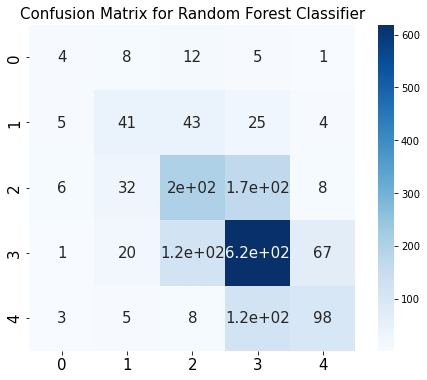

In [64]:
rfc = RandomForestClassifier()
rfc.fit(x_train_rfc, y_train_rfc)
y_pred_rfc = rfc.predict(x_test_rfc)
acc_rfc = rfc.score(x_test_rfc, y_test_rfc)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred_rfc, 'Random Forest Classifier')

### RandomForest with popularity target variable

In [65]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test_rfc2, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test_rfc2, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

The accuracy of the Random Forest Classifier is: 51.79233621755254 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           2       0.25      0.07      0.11        30
           3       0.36      0.23      0.28       118
           4       0.42      0.40      0.41       412
           5       0.58      0.70      0.64       824
           6       0.44      0.29      0.35       230
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2

    accuracy                           0.52      1618
   macro avg       0.29      0.24      0.25      1618
weighted avg       0.50      0.52      0.50      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


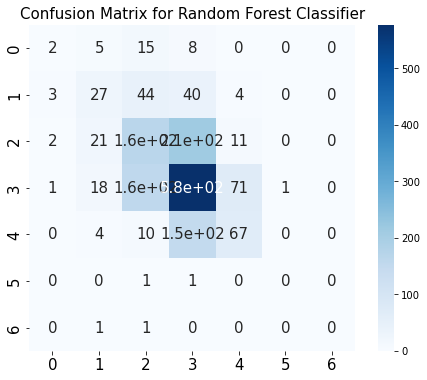

In [66]:
x2 = netflix_dummies_clean.drop('popularity', axis = 1)
y2 = netflix_dummies_clean['popularity']

x_train_rfc2, x_test_rfc2, y_train_rfc2, y_test_rfc2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

rfc2 = RandomForestClassifier()
rfc2.fit(x_train_rfc2, y_train_rfc2)
y_pred_rfc2 = rfc2.predict(x_test_rfc2)
acc_rfc2 = rfc2.score(x_test_rfc2, y_test_rfc2)
print('The accuracy of the Random Forest Classifier is:', acc_rfc2 * 100, '%')
generate_results(rfc2, y_pred_rfc2, 'Random Forest Classifier')

# PassiveAggressiveClassifier

In [67]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test_pag, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test_pag, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### PassiveAggressiveClassifier with rating  target variable¶

In [68]:
x_train_pag, x_test_pag, y_train_pag, y_test_pag = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating model
model_passagg = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
# Fitting model 
model_passagg.fit(x_train_pag, y_train_pag)
# Making prediction on test set
y_pred_pag = model_passagg.predict(x_test_pag)
# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test_pag, y_pred_pag) * 100} %\n\n")  
print(f"Classification Report : \n\n{classification_report(y_test_pag, y_pred_pag)}")

Test Set Accuracy : 29.72805933250927 %


Classification Report : 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       118
           3       0.21      0.25      0.23       412
           4       0.46      0.43      0.45       826
           5       0.06      0.10      0.08       232

    accuracy                           0.30      1618
   macro avg       0.15      0.16      0.15      1618
weighted avg       0.30      0.30      0.30      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### PassiveAggressiveClassifier with popularity target variable

In [69]:
x_train_pag2, x_test_pag2, y_train_pag2, y_test_pag2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Creating model
model_passagg2 = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
# Fitting model 
model_passagg2.fit(x_train_pag2, y_train_pag2)
# Making prediction on test set
y_pred_pag2 = model_passagg2.predict(x_test_pag2)
# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test_pag2, y_pred_pag2) * 100} %\n\n")  
print(f"Classification Report : \n\n{classification_report(y_test_pag2, y_pred_pag2)}")

Test Set Accuracy : 50.92707045735476 %


Classification Report : 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00       118
           4       0.00      0.00      0.00       412
           5       0.51      1.00      0.67       824
           6       0.00      0.00      0.00       230
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2

    accuracy                           0.51      1618
   macro avg       0.07      0.14      0.10      1618
weighted avg       0.26      0.51      0.34      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ComplementNB

In [70]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test_cnb, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test_cnb, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### ComplementNB with rating target variable

The accuracy of the  ComplementNB is: 26.57601977750309 %

The classification report for ComplementNB is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       118
           3       0.27      0.90      0.41       412
           4       0.00      0.00      0.00       826
           5       0.25      0.26      0.26       232

    accuracy                           0.27      1618
   macro avg       0.10      0.23      0.13      1618
weighted avg       0.10      0.27      0.14      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


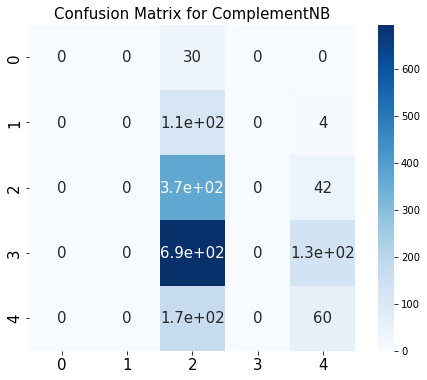

In [71]:
x_train_cnb, x_test_cnb, y_train_cnb, y_test_cnb = train_test_split(x, y, test_size=0.2, random_state=42)

cnb = ComplementNB()
cnb.fit(x, y)
y_pred_cnb = cnb.predict(x_test_cnb)
acc_cnb = cnb.score(x_test_cnb, y_test_cnb)
print('The accuracy of the  ComplementNB is:', acc_cnb * 100, '%')
generate_results(cnb, y_pred_cnb, 'ComplementNB')

### ComplementNB with popularity target variable

The accuracy of the  ComplementNB is: 49.44375772558715 %

The classification report for ComplementNB is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       118
           3       0.17      0.00      0.01       412
           4       0.38      0.29      0.32       826
           5       0.12      0.32      0.17       232
           6       0.00      0.00      0.00         0

    accuracy                           0.19      1618
   macro avg       0.11      0.10      0.08      1618
weighted avg       0.25      0.19      0.19      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\li

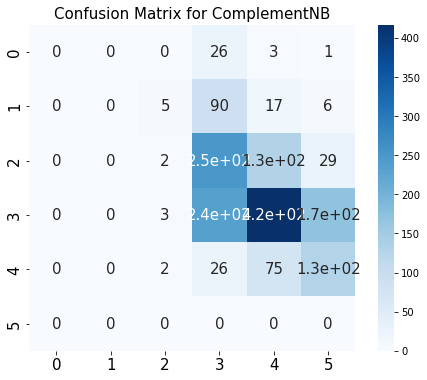

In [72]:
x_train_cnb2, x_test_cnb2, y_train_cnb2, y_test_cnb2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

cnb2 = ComplementNB()
cnb2.fit(x2, y2)
y_pred_cnb2 = cnb2.predict(x_test_cnb2)
acc_cnb2 = cnb2.score(x_test_cnb2, y_test_cnb2)
print('The accuracy of the  ComplementNB is:', acc_cnb2 * 100, '%')
generate_results(cnb2, y_pred_cnb2, 'ComplementNB')

# SGDClassifier

In [73]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test_sgd, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test_sgd, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### SGDClassifier with target variable

The accuracy of the  ComplementNB is: 53.64647713226205 %

The classification report for SGDClassifier is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.40      0.16      0.23       118
           3       0.44      0.22      0.29       412
           4       0.57      0.83      0.68       826
           5       0.45      0.32      0.38       232

    accuracy                           0.54      1618
   macro avg       0.37      0.31      0.31      1618
weighted avg       0.50      0.54      0.49      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


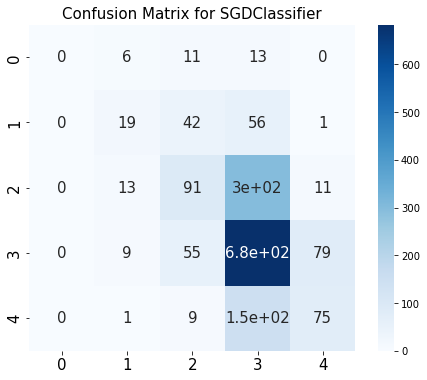

In [74]:
x_train_sgd, x_test_sgd, y_train_sgd, y_test_sgd = train_test_split(x, y, test_size=0.2, random_state=42)

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(x, y)
y_pred_sgd = sgd.predict(x_test_sgd)
acc_sgd = sgd.score(x_test_sgd, y_test_sgd)
print('The accuracy of the  ComplementNB is:', acc_sgd * 100, '%')
generate_results(sgd, y_pred_sgd, 'SGDClassifier')

The accuracy of the  ComplementNB is: 51.050679851668725 %

The classification report for SGDClassifier is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.40      0.16      0.23       118
           3       0.44      0.22      0.29       412
           4       0.57      0.83      0.68       826
           5       0.45      0.32      0.38       232

    accuracy                           0.54      1618
   macro avg       0.37      0.31      0.31      1618
weighted avg       0.50      0.54      0.49      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


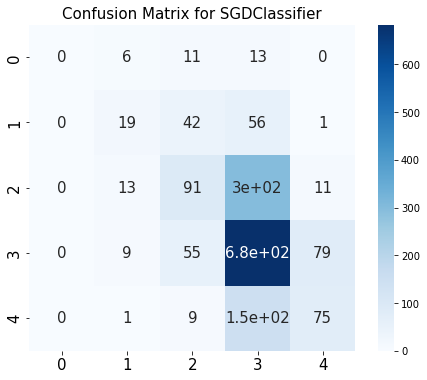

0.5

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
lr = SGDClassifier(loss='hinge',class_weight='balanced')
clf1 =lr.fit(x, y)
calibrator = CalibratedClassifierCV(clf1, cv='prefit')
model=calibrator.fit(x, y)
# Always scale the input. The most convenient way is to use a pipeline.
y_pred = model.predict(x_test_sgd)
acc_clf = model.score(x_test_sgd, y_test_sgd)
print('The accuracy of the  ComplementNB is:', acc_clf * 100, '%')
generate_results(rfc, y_pred_sgd, 'SGDClassifier')
roc_auc_score(y, model.predict_proba(x), average='macro',multi_class='ovr')

### SGBClassifier with popularity variable

The accuracy of the  ComplementNB is: 50.92707045735476 %

The classification report for SGDClassifier is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.20      0.02      0.03       118
           3       0.41      0.07      0.12       412
           4       0.25      0.05      0.08       826
           5       0.15      0.81      0.25       232
           6       0.00      0.00      0.00         0

    accuracy                           0.16      1618
   macro avg       0.17      0.16      0.08      1618
weighted avg       0.27      0.16      0.11      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\li

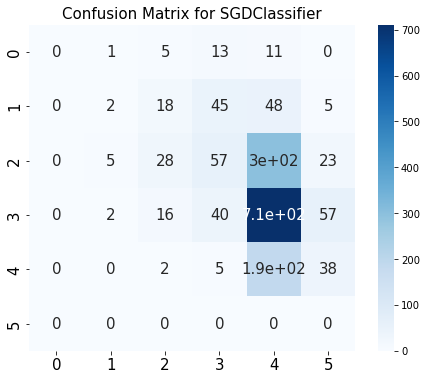

In [76]:
x_train_sgd2, x_test_sgd2, y_train_sgd2, y_test_sgd2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

sgd2 = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd2.fit(x2, y2)
y_pred_sgd2 = sgd2.predict(x_test_sgd2)
acc_sgd2 = sgd2.score(x_test_sgd2, y_test_sgd2)
print('The accuracy of the  ComplementNB is:', acc_sgd2 * 100, '%')
generate_results(sgd2, y_pred_sgd2, 'SGDClassifier')

The accuracy of the  ComplementNB is: 50.92707045735476 %

The classification report for SGDClassifier is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.20      0.02      0.03       118
           3       0.41      0.07      0.12       412
           4       0.25      0.05      0.08       826
           5       0.15      0.81      0.25       232
           6       0.00      0.00      0.00         0

    accuracy                           0.16      1618
   macro avg       0.17      0.16      0.08      1618
weighted avg       0.27      0.16      0.11      1618



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\li

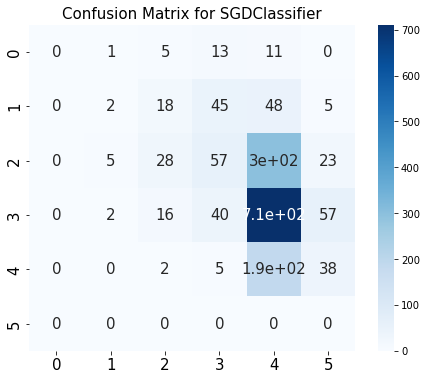

0.4735669864518955

In [84]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
lr = SGDClassifier(loss='hinge',class_weight='balanced')
clf2 =lr.fit(x2, y2)
calibrator = CalibratedClassifierCV(clf2, cv='prefit')
model2=calibrator.fit(x2, y2)
# Always scale the input. The most convenient way is to use a pipeline.
y_pred2 = model2.predict(x_test_sgd2)
acc_clf2 = model2.score(x_test_sgd2, y_test_sgd2)
print('The accuracy of the  ComplementNB is:', acc_clf2 * 100, '%')
generate_results(rfc2, y_pred_sgd2, 'SGDClassifier')
roc_auc_score(y2, model2.predict_proba(x2), average='macro',multi_class='ovr')

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('RandomForestClassifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_rfc, y_pred_rfc))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_rfc, y_pred_rfc).round(4)}')
print(f'Precision = {precision_score(y_test_rfc, y_pred_rfc, average=None, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_rfc, y_pred_rfc,average=None).round(4)}')
print(f'F1 score = {f1_score(y_test_rfc, y_pred_rfc, average=None).round(4)}')
print('\n')


print('SGDCClassifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_sgd, y_pred_sgd))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_sgd, y_pred_sgd).round(4)}')
print(f'Precision = {precision_score(y_test_sgd, y_pred_sgd, average="macro", zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_sgd, y_pred_sgd, average="macro").round(4)}')
print(f'F1 score = {f1_score(y_test_sgd, y_pred_sgd, average="macro").round(4)}')
print('\n')


print('ComplementNB')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_cnb, y_pred_cnb))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_cnb, y_pred_cnb).round(4)}')
print(f'Precision = {precision_score(y_test_cnb, y_pred_cnb, average="macro", zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_cnb, y_pred_cnb, average="macro").round(4)}')
print(f'F1 score = {f1_score(y_test_cnb, y_pred_cnb, average="macro").round(4)}')
print('\n')


print('PassiveAggressiveClassifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_pag, y_pred_pag))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_pag, y_pred_pag).round(4)}')
print(f'Precision = {precision_score(y_test_pag, y_pred_pag, average="macro", zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_pag, y_pred_pag, average="macro").round(4)}')
print(f'F1 score = {f1_score(y_test_pag, y_pred_pag, average="macro").round(4)}')
print('\n')

RandomForestClassifier
Confusion matrix
[[  4   8  12   5   1]
 [  5  41  43  25   4]
 [  6  32 200 166   8]
 [  1  20 119 619  67]
 [  3   5   8 118  98]]
-------------------
Accuracy = 0.5946
Precision = [0.2105 0.3868 0.5236 0.6635 0.5506]
Recall = [0.1333 0.3475 0.4854 0.7494 0.4224]
F1 score = [0.1633 0.3661 0.5038 0.7038 0.478 ]


SGDCClassifier
Confusion matrix
[[  0   6  11  13   0]
 [  0  19  42  56   1]
 [  0  13  91 297  11]
 [  0   9  55 683  79]
 [  0   1   9 147  75]]
-------------------
Accuracy = 0.5365
Precision = 0.3712
Recall = 0.3064
F1 score = 0.315


ComplementNB
Confusion matrix
[[  0   0  30   0   0]
 [  0   0 114   0   4]
 [  0   0 370   0  42]
 [  0   0 694   0 132]
 [  0   0 172   0  60]]
-------------------
Accuracy = 0.2658
Precision = 0.104
Recall = 0.2313
F1 score = 0.1337


PassiveAggressiveClassifier
Confusion matrix
[[  0   0   2  19   9]
 [  0   0  16  67  35]
 [  0   0 102 201 109]
 [  0   0 279 356 191]
 [  0   0  83 126  23]]
-------------------
Ac

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('RandomForestClassifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_rfc2, y_pred_rfc2))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_rfc2, y_pred_rfc2).round(4)}')
print(f'Precision = {precision_score(y_test_rfc2, y_pred_rfc2, average=None, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_rfc2, y_pred_rfc2,average=None).round(4)}')
print(f'F1 score = {f1_score(y_test_rfc2, y_pred_rfc2, average=None).round(4)}')
print('\n')


print('SGDCClassifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_sgd2, y_pred_sgd2))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_sgd2, y_pred_sgd2).round(4)}')
print(f'Precision = {precision_score(y_test_sgd2, y_pred_sgd2, average="macro", zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_sgd2, y_pred_sgd2, average="macro").round(4)}')
print(f'F1 score = {f1_score(y_test_sgd2, y_pred_sgd2, average="macro").round(4)}')
print('\n')


print('ComplementNB')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_cnb2, y_pred_cnb2))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_cnb2, y_pred_cnb2).round(4)}')
print(f'Precision = {precision_score(y_test_cnb2, y_pred_cnb2, average="macro", zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_cnb2, y_pred_cnb2, average="macro").round(4)}')
print(f'F1 score = {f1_score(y_test_cnb2, y_pred_cnb2, average="macro").round(4)}')
print('\n')


print('PassiveAggressiveClassifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test_pag2, y_pred_pag2))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test_pag2, y_pred_pag2).round(4)}')
print(f'Precision = {precision_score(y_test_pag2, y_pred_pag2, average="macro", zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test_pag2, y_pred_pag2, average="macro").round(4)}')
print(f'F1 score = {f1_score(y_test_pag2, y_pred_pag2, average="macro").round(4)}')
print('\n')

RandomForestClassifier
Confusion matrix
[[  2   5  15   8   0   0   0]
 [  3  27  44  40   4   0   0]
 [  2  21 165 213  11   0   0]
 [  1  18 156 577  71   1   0]
 [  0   4  10 149  67   0   0]
 [  0   0   1   1   0   0   0]
 [  0   1   1   0   0   0   0]]
-------------------
Accuracy = 0.5179
Precision = [0.25   0.3553 0.4209 0.584  0.4379 0.     0.    ]
Recall = [0.0667 0.2288 0.4005 0.7002 0.2913 0.     0.    ]
F1 score = [0.1053 0.2784 0.4104 0.6369 0.3499 0.     0.    ]


SGDCClassifier
Confusion matrix
[[  1   5  13  11   0   0   0]
 [  2  18  45  48   5   0   0]
 [  5  28  57 299  23   0   0]
 [  2  15  40 710  57   0   0]
 [  0   2   5 185  38   0   0]
 [  0   0   0   2   0   0   0]
 [  0   1   0   1   0   0   0]]
-------------------
Accuracy = 0.5093
Precision = 0.2273
Recall = 0.193
F1 score = 0.1914


ComplementNB
Confusion matrix
[[  0   0  26   3   1   0   0]
 [  0   5  90  17   6   0   0]
 [  0   2 250 131  29   0   0]
 [  0   3 235 416 170   0   0]
 [  0   2  25  74 129

In [78]:
from sklearn.metrics import roc_auc_score

print(f' ROC_AUC score for RandomForestClassifier = {roc_auc_score(y, rfc.predict_proba(x), multi_class="ovr").round(4)}')
print(f' ROC_AUC score for ComplementNB = {roc_auc_score(y, cnb.predict_proba(x), multi_class="ovr").round(4)}')
print(f' ROC_AUC score for SGDClassifier = {roc_auc_score(y, model.predict_proba(x),average="macro", multi_class="ovr").round(4)}')

 ROC_AUC score for RandomForestClassifier = 0.966
 ROC_AUC score for ComplementNB = 0.5277
 ROC_AUC score for SGDClassifier = 0.5


In [85]:
print(f' ROC_AUC score for RandomForestClassifier = {roc_auc_score(y2, rfc2.predict_proba(x2), multi_class="ovr").round(4)}')
print(f' ROC_AUC score for ComplementNB = {roc_auc_score(y2, cnb2.predict_proba(x2), multi_class="ovr").round(4)}')
print(f' ROC_AUC score for SGDClassifier = {roc_auc_score(y2, model2.predict_proba(x2),average="macro", multi_class="ovr").round(4)}')

 ROC_AUC score for RandomForestClassifier = 0.9309
 ROC_AUC score for ComplementNB = 0.771
 ROC_AUC score for SGDClassifier = 0.4736


ROC model for RFC is the best model because:
    - it has the best accuracy overall
    - it has the best ROC score overall, which is very close to 1 

In [86]:
netflix_dummies.columns

Index(['year', 'rating', 'vote', 'kind_movie', 'kind_series', 'kind_tv short',
       'kind_video game', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
       'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Film-Noir',
       'genre_Game-Show', 'genre_History', 'genre_Horror', 'genre_Music',
       'genre_Musical', 'genre_Mystery', 'genre_Reality-TV', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Short', 'genre_Sport', 'genre_Talk-Show',
       'genre_Thriller', 'genre_War', 'genre_Western', 'country_Canada',
       'country_France', 'country_Hong Kong', 'country_India', 'country_Japan',
       'country_Other country', 'country_United Kingdom',
       'country_United States', 'language_Other language'],
      dtype='object')

In [89]:
boite_noire=pd.DataFrame({'year':2021,  'vote':5725, 'kind_movie':1, 'kind_series':0, 'kind_tv short':0,
       'kind_video game':0, 'genre_Action':0, 'genre_Adventure':0, 'genre_Animation':0,
       'genre_Biography':0, 'genre_Comedy':0, 'genre_Crime':0, 'genre_Documentary':0,
       'genre_Drama':0, 'genre_Family':0, 'genre_Fantasy':0, 'genre_Film-Noir':0,
       'genre_Game-Show':0, 'genre_History':0, 'genre_Horror':0, 'genre_Music':0,
       'genre_Musical':0, 'genre_Mystery':0, 'genre_Reality-TV':0, 'genre_Romance':0,
       'genre_Sci-Fi':0, 'genre_Short':0, 'genre_Sport':0, 'genre_Talk-Show':0,
       'genre_Thriller':1, 'genre_War':0, 'genre_Western':0, 'country_Canada':0,
       'country_France':1, 'country_Hong Kong':0, 'country_India':0, 'country_Japan':0,
       'country_Other country':0, 'country_United Kingdom':0,
       'country_United States':0, 'language_Other language':1}, index=range(1))
boite_noire

,year,vote,kind_movie,kind_series,kind_tv short,kind_video game,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Western,country_Canada,country_France,country_Hong Kong,country_India,country_Japan,country_Other country,country_United Kingdom,country_United States,language_Other language
0,2021,5725,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [91]:
y_pred_rfc = rfc.predict(boite_noire)
y_pred_rfc

array([4], dtype=int64)